## 배깅 bagging 
#### <img src='./img/bagging.png' width='75%'><br>
* boostrap aggregating
* 보통 구축한 트리에는 랜덤성이 없는데 랜덤한 데이터를 이용해서 트리를 구성하는 방법은?
     + 훈련 데이터셋에서 중복을 허용하여 무작위 추출sampling => 배깅
* 통계학에서 샘플데이터의 수가 적거나 샘플이 치우쳐 있는 경우에는 과적합의 문제 발생
* 머신러닝의 경우에도 학습데이터의 양이 작거나 너무 학습데이터에 특화해서 학습하게 되면
* 학습데이터에 대해 좋은 결과를 내지만 실제 데이터에서는 성능이 좋지 않게 나올수 있음(과적합)

## 부트스트래핑 boostraing
* 전체 모집단의 분포를 확실하게 알 수 없는 경우에 표본을 취한후 그 표본이 전체 집단을 대표한다는 가정하에 전체 분포를 유추하는 방법
* 이때 표본으로부터 많은 횟수에 걸쳐 샘플을 복원추출한 후 각 샘플에 대한 분포를 구함 - 이를 통해 전체의 분포를 유추
* 실제로 머신러닝에 많이 사용되는 방식
    + 회귀의 경우는 평균을 취해 분산을 줄이는 방식을 사용
    + 분류의 경우는 투표를 통해 빈도값이 높은 것을 취하는 방식 사용
* 베깅을 사용하면 안되는 경우
    + 표본 데이터가 작은 경우   : 전체를 반영 못함
    + 데이터에 잡음이 많은 경우 : 왜곡된 결과 나올 가능성 존재
    + 데이터에 의존성이 있는 경우 : 다중공선성-독립적이어야 함

In [1]:
from load_ds_module import *

### 테스트용 데이터 생성 및 분할

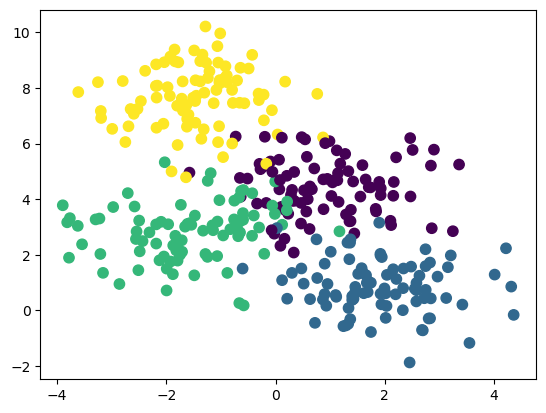

In [2]:
X, y = make_blobs(n_samples=350, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=55)
plt.show()

In [3]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, train_size=0.75,
                       stratify=y, random_state=2309271105)

### 배깅을 이용한 분류

In [28]:
# n_estimators : 모형 갯수 지정
# bootstrap : 부트스트랩(샘플추출시 중복허용) 여부
# n_jobs : 다중작업수 지정
# oob_score : 베깅 평가지수 사용여부
bggclf = BaggingClassifier(DecisionTreeClassifier(),
                          n_estimators=500, bootstrap=True, # 갯수지정
                          n_jobs=-1, oob_score=True) 

In [29]:
bggclf.fit(X_train, y_train)
bggclf.score(X_train, y_train)

1.0

## oob_score : out-of-bag score
* oob는 **부트스트래핑 샘플링시 선택되지 않은 표본**을 의미
* 기본적으로 중복을 허용하여 훈련데이터 크기만큼 n개(70%)의 샘플을 추출하면 나머지(30%)는 oob 샘플로 남음
* 매번 예측할때 마다 남겨진 oob샘플은 다를것임
* 따라서, **예측시 검증 데이터를 사용하지 않고, oob 샘플을 이용해서 평가** 시행
* 해당 평가점수는 oob_score에 저장

In [30]:
bggclf.oob_score_

0.9198473282442748

In [31]:
pred = bggclf.predict(X_test)
accuracy_score(y_test, pred)

0.8863636363636364

/opt/conda/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

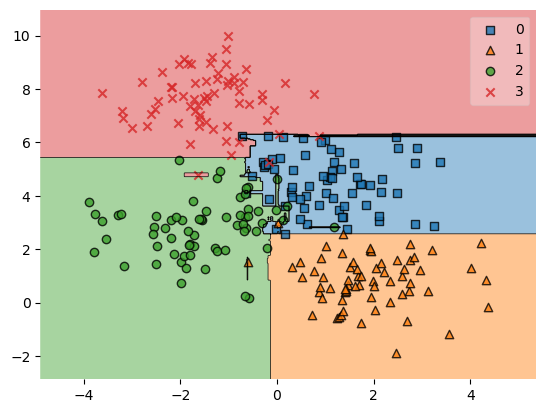

In [32]:
plot_decision_regions(X_train, y_train, bggclf)

/opt/conda/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

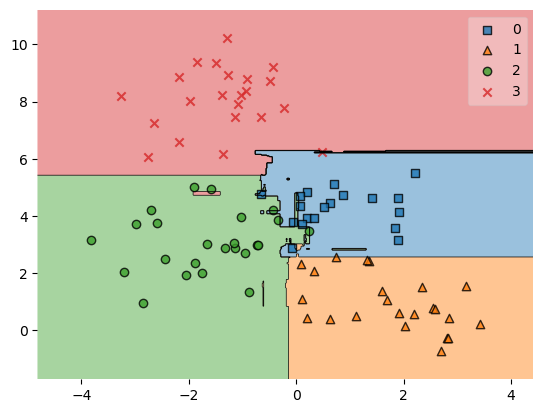

In [33]:
plot_decision_regions(X_test, pred, bggclf)

### 중복허용없이 무작위 추출후 분석

In [20]:
bggclf = BaggingClassifier(DecisionTreeClassifier(),
                          n_estimators=500, bootstrap=False, 
                          n_jobs=-1, oob_score=False) 

In [21]:
bggclf.fit(X_train, y_train)
bggclf.score(X_train, y_train)

1.0

In [22]:
bggclf.oob_score_

AttributeError: 'BaggingClassifier' object has no attribute 'oob_score_'

In [23]:
pred = bggclf.predict(X_test)
accuracy_score(y_test, pred)

0.8636363636363636

### 결정 경계 시각화

/opt/conda/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

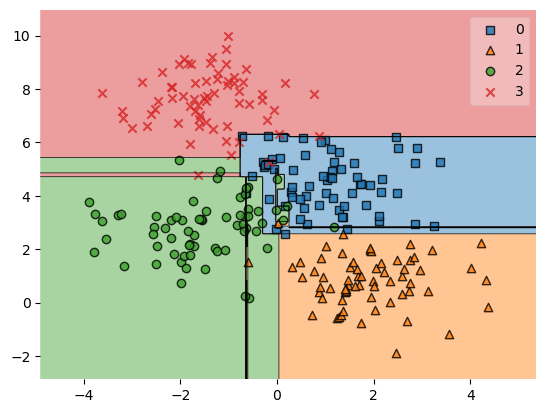

In [25]:
plot_decision_regions(X_train, y_train, bggclf)

/opt/conda/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

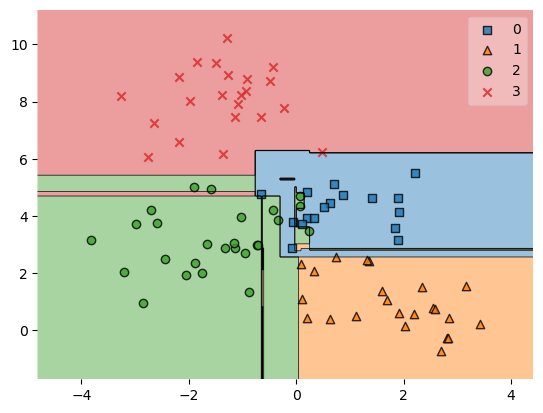

In [26]:
plot_decision_regions(X_test, pred, bggclf)

### iris 데이터를 babbing 분류기로 분석

In [54]:
iris = load_iris()

data = iris.data[:, :2]
#data = iris.data[:, 2:]
target = iris.target

X_train, X_test, y_train, y_test = \
        train_test_split(data, target, train_size=0.75,
                       stratify=target, random_state=2309271145)

In [60]:
bggclf = BaggingClassifier(DecisionTreeClassifier(),
                          n_estimators=100, bootstrap=True, # 갯수지정
                          n_jobs=-1, oob_score=True, random_state=2309271145)
bggclf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=2309271145)

In [61]:
bggclf.oob_score_

0.6785714285714286

In [62]:
pred = bggclf.predict(X_test)
accuracy_score(y_test, pred)

0.7631578947368421

<Axes: >

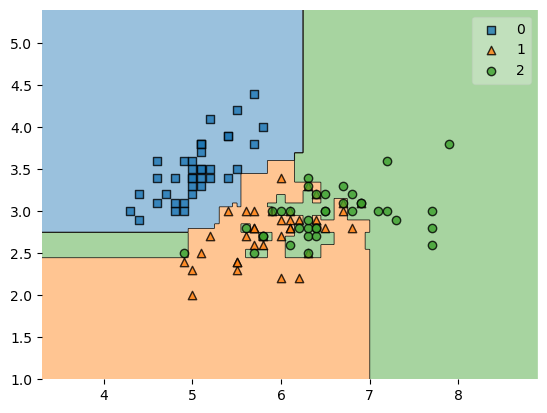

In [63]:
plot_decision_regions(X_train, y_train, bggclf)

<Axes: >

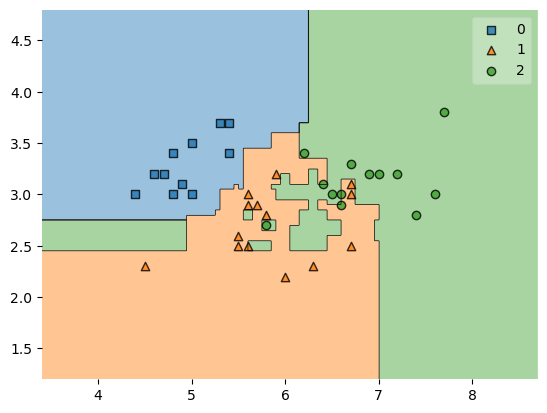

In [64]:
plot_decision_regions(X_test, pred, bggclf)

In [65]:
data = iris.data[:, 2:]
target = iris.target

X_train, X_test, y_train, y_test = \
        train_test_split(data, target, train_size=0.75,
                       stratify=target, random_state=2309271145)

In [66]:
bggclf = BaggingClassifier(DecisionTreeClassifier(),
                          n_estimators=100, bootstrap=True, # 갯수지정
                          n_jobs=-1, oob_score=True, random_state=2309271145)
bggclf.fit(X_train, y_train)
bggclf.score(X_train, y_train)

1.0

In [67]:
bggclf.oob_score_

0.9642857142857143

In [68]:
pred = bggclf.predict(X_test)
accuracy_score(y_test, pred)

0.9473684210526315

<Axes: >

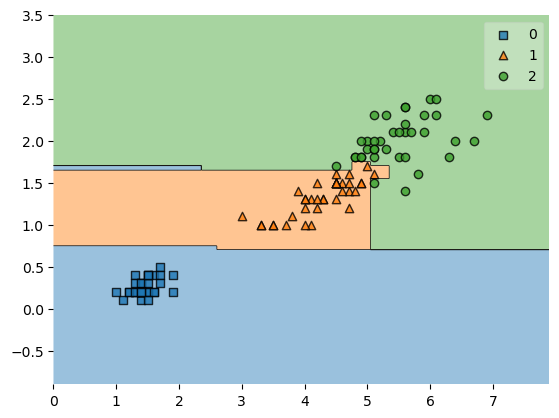

In [69]:
plot_decision_regions(X_train, y_train, bggclf)

<Axes: >

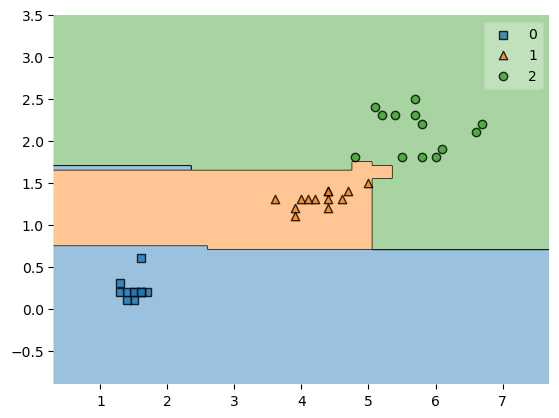

In [70]:
plot_decision_regions(X_test, pred, bggclf)